# Health Searches (2005 - 2017)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Data Cleaning and Filtering

In [3]:
data = pd.read_csv('Health_Searches.csv')

data = data[data['dma'].str.contains('TX')] #filter for texas rows 

data = data.drop(columns= 'geoCode') #remove geoCode column 

data.head()

dma  2004+cancer  2004+cardiovascular  2004+stroke  \
84      Corpus Christi TX           37                    7           17   
97             Houston TX           47                    8           16   
100   Dallas-Ft. Worth TX           38                    7           16   
102  Waco-Temple-Bryan TX           40                   11           14   
103           Victoria TX           64                    0           35   

     2004+depression  2004+rehab  2004+vaccine  2004+diarrhea  2004+obesity  \
84                37          18            32             11            32   
97                33          18            29             12            24   
100               35          19            27             12            22   
102               37          17            19             13            40   
103              100           0             0              0             0   

     2004+diabetes  ...  2016+diabetes  2017+cancer  2017+cardiovascular  \
84              43  ...             89           57                   30   
97              37  ...             75           61                   35   
100             35  ...             71           55                   35   
102             39  ...             77           57                   41   
103             35  ...             87           63                   31   

     2017+stroke  2017+depression  2017+rehab  2017+vaccine  2017+diarrhea  \
84            63               60          51            64             81   
97            59               53          40            74             61   
100           55               52          50            64             61   
102           65               64          45            92             75   
103           57               58          76            69             76   

     2017+obesity  2017+diabetes  
84             42             82  
97             44             74  
100            39             69  
102            81             79  
103             0             84  

[5 rows x 127 columns]

In [4]:
# # data.loc[:, data.columns.str.contains('cancer')]
# data_cancer = data.filter(like= 'cancer').copy()
# data_cardiovascular = data.filter(like = 'cardiovascular').copy()
# data_stroke = data.filter(like= 'stroke').copy()
# data_depression = data.filter(like= 'depression').copy()
# data_rehab = data.filter(like= 'rehab').copy()
# data_vaccine = data.filter(like= 'vaccine').copy()
# data_diarrhea = data.filter(like= 'diarrhea').copy()
# data_obesity = data.filter(like= 'obesity').copy()
# data_diabetes = data.filter(like= 'diabetes').copy()

Take mean of cancer for each city, and graph across a bar graph for each city (this can be repeated for other cities)

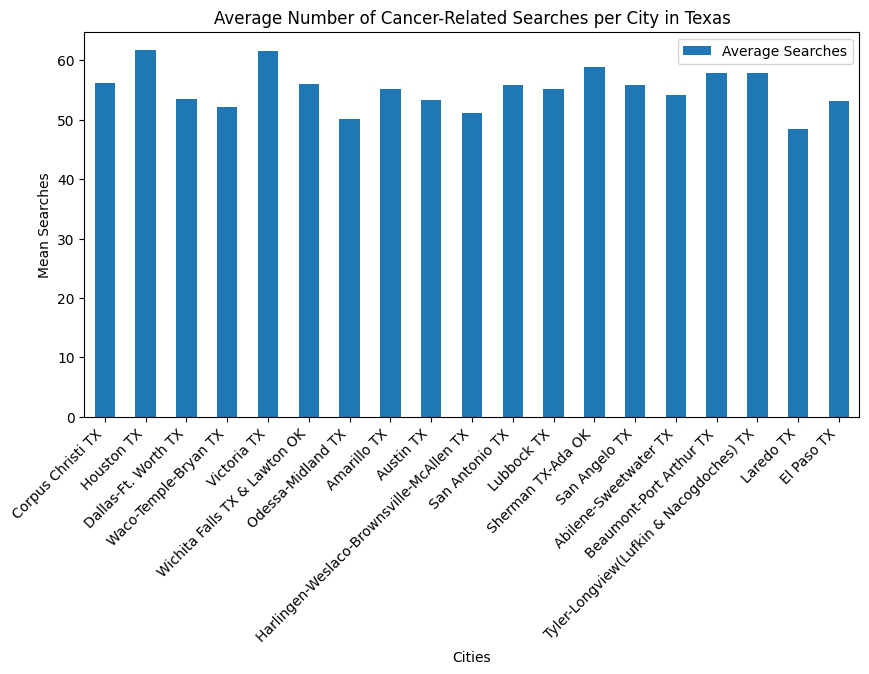

In [5]:
#re-insert the column that holds location information 
data_cancer = data.filter(like= 'cancer').copy()
new = data['dma']
data_cancer.loc[:,'Location'] = new 
# move 'Location' to the front index
col = data_cancer.pop('Location')
data_cancer.insert(0, col.name, col)

#Make new dataframe with mean values and Location 
mean = data_cancer.drop(columns= 'Location').mean(axis=1)
summary_df = pd.DataFrame({
    'Location': data_cancer['Location'], 
    'Average': mean
})
#Set 'Location" as the new index and remove rows with NaN values
summary_df = summary_df.set_index('Location')
summary_df = summary_df.dropna()

summary_df.plot(kind='bar', figsize= (10,5))
plt.title('Average Number of Cancer-Related Searches per City in Texas')
plt.legend(['Average Searches'])
plt.xlabel('Cities')
plt.ylabel('Mean Searches')
plt.xticks(rotation=45, ha= 'right')
plt.show()


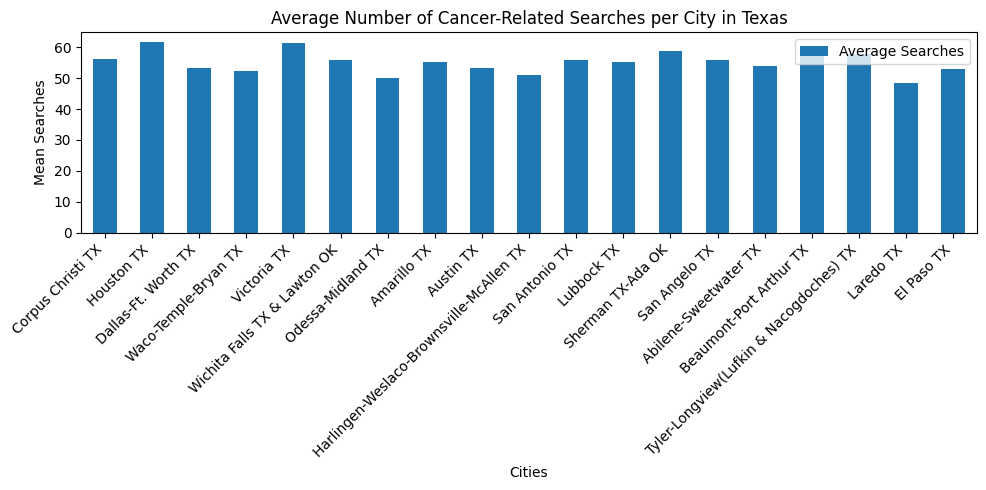

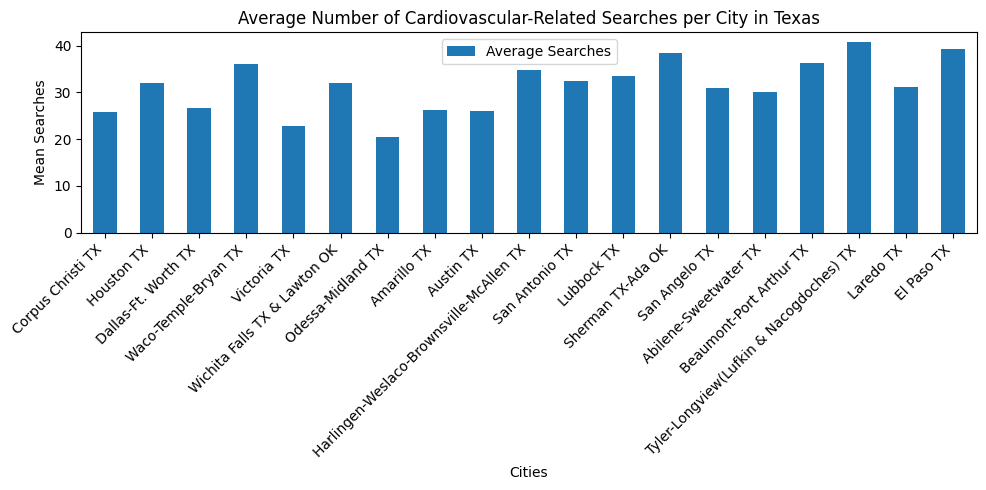

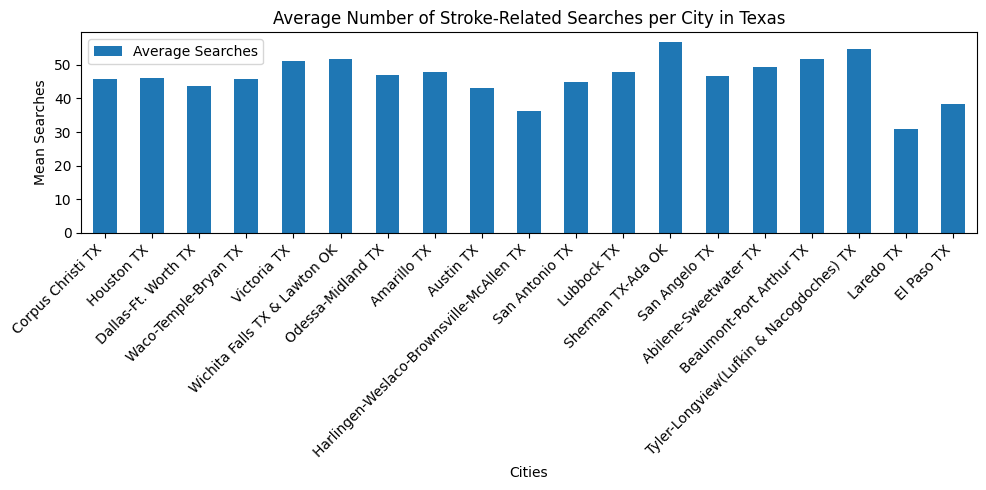

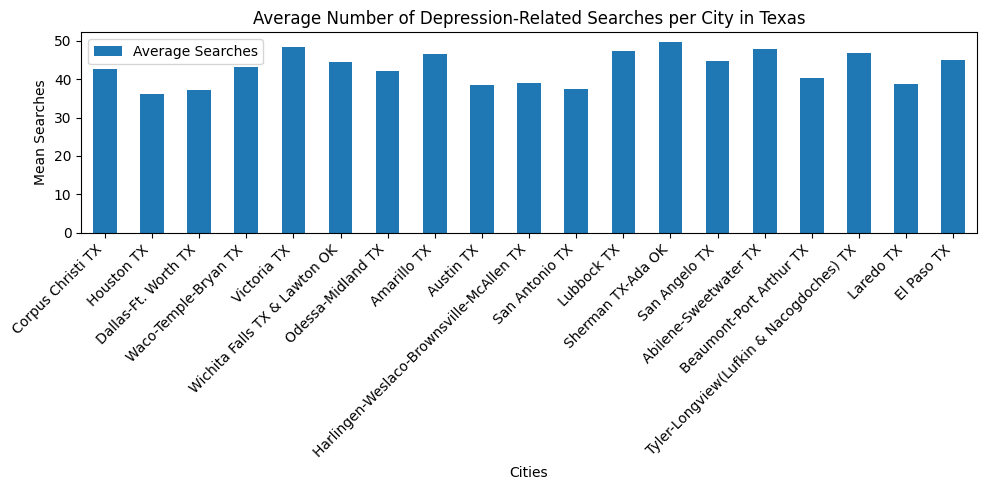

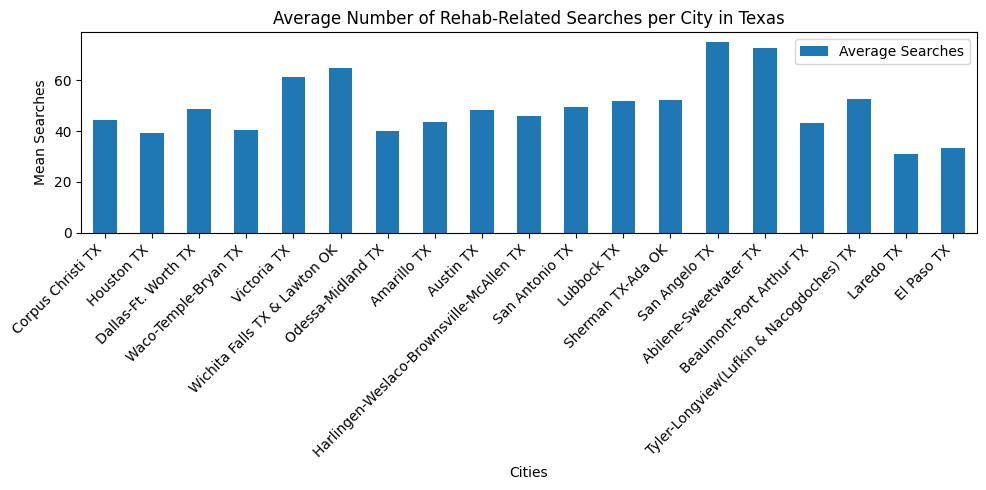

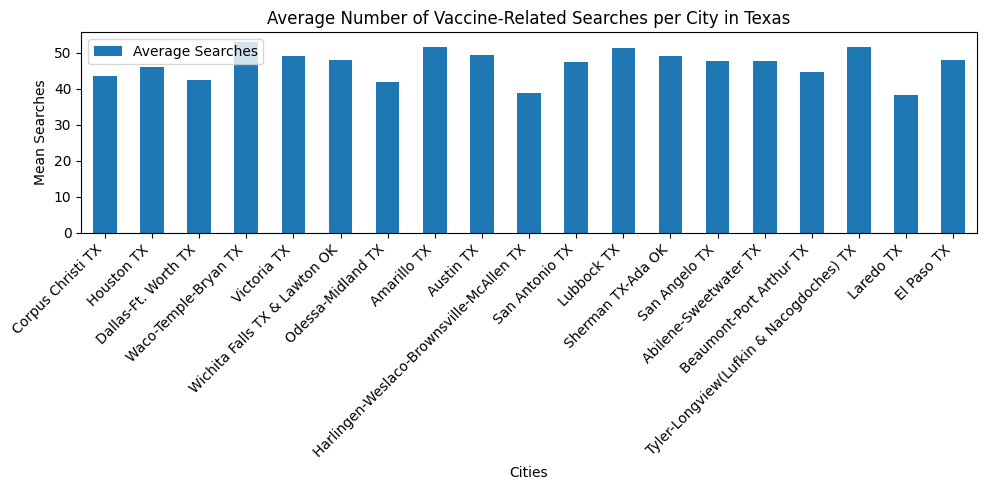

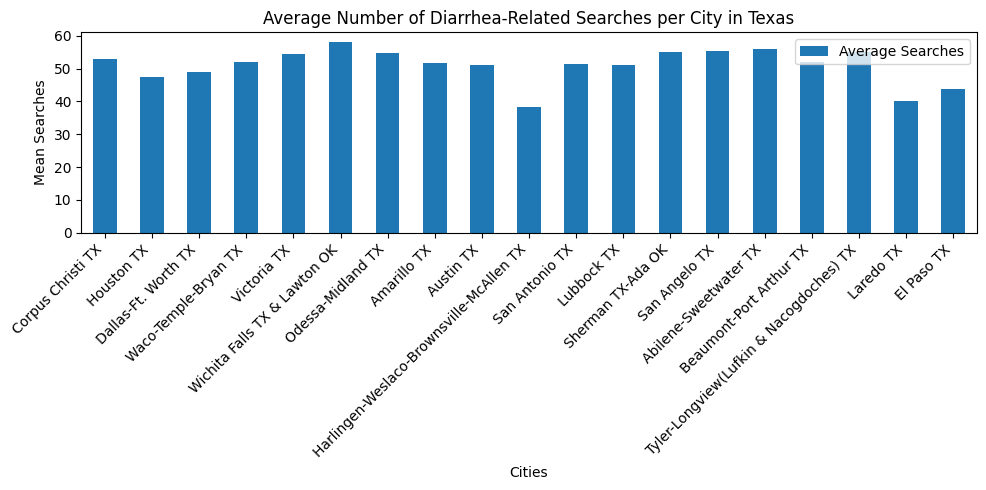

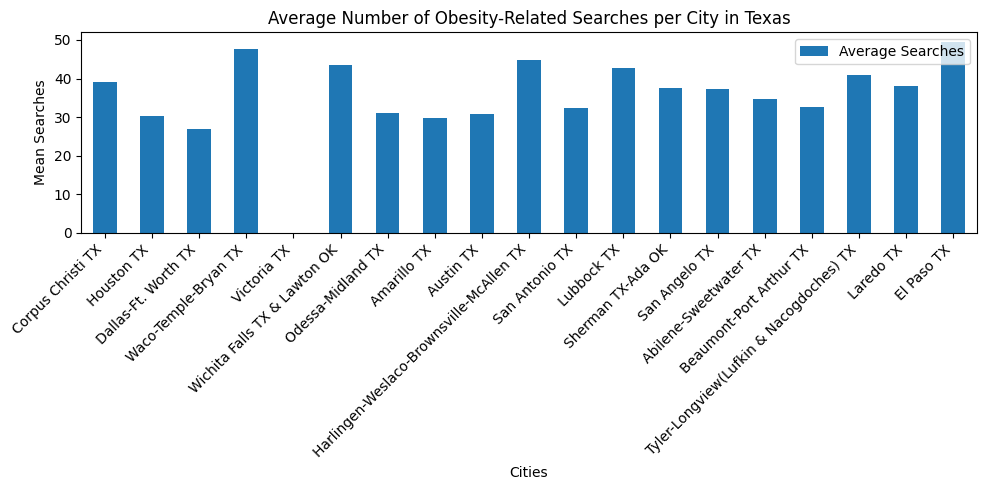

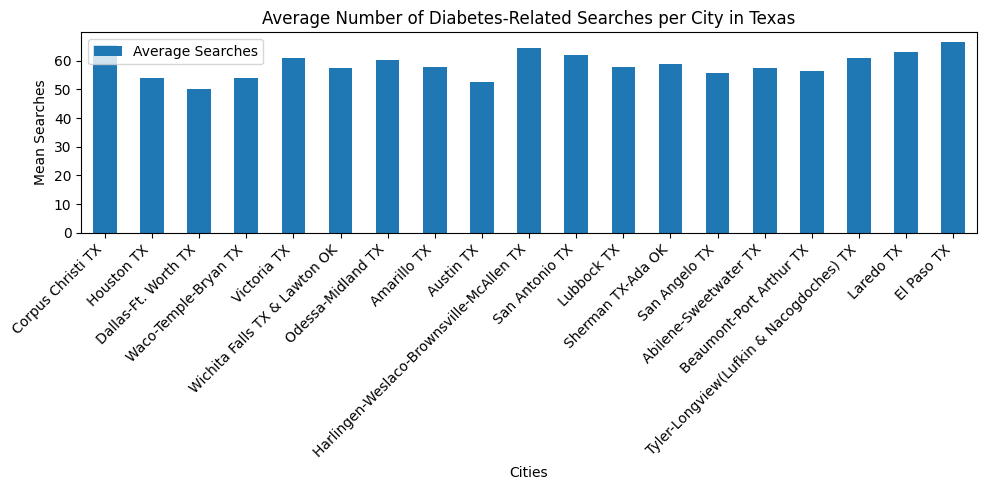

In [6]:
data_cancer = data.filter(like= 'cancer').copy()
data_cardiovascular = data.filter(like = 'cardiovascular').copy()
data_stroke = data.filter(like= 'stroke').copy()
data_depression = data.filter(like= 'depression').copy()
data_rehab = data.filter(like= 'rehab').copy()
data_vaccine = data.filter(like= 'vaccine').copy()
data_diarrhea = data.filter(like= 'diarrhea').copy()
data_obesity = data.filter(like= 'obesity').copy()
data_diabetes = data.filter(like= 'diabetes').copy()

def graph(full_data, keyword):    
    # Filter for Texas data
    data_filtered = full_data[full_data['dma'].str.contains('TX')].copy()

    # Add 'Location' column before filtering columns
    data_filtered['Location'] = data_filtered['dma']

    # Filter for keyword-related columns + Location
    cols = [col for col in data_filtered.columns if keyword in col] + ['Location']
    dataframe = data_filtered[cols].copy()

    # Move 'Location' to front
    col = dataframe.pop('Location')
    dataframe.insert(0, col.name, col)

    # Calculate average across years
    mean = dataframe.drop(columns='Location').mean(axis=1)
    summary_df = pd.DataFrame({
        'Location': dataframe['Location'], 
        'Average': mean
    }).dropna()

    summary_df = summary_df.set_index('Location')

    # Plot
    summary_df.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Average Number of {keyword.capitalize()}-Related Searches per City in Texas')
    plt.legend(['Average Searches'])
    plt.xlabel('Cities')
    plt.ylabel('Mean Searches')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

graph(data, 'cancer')
graph(data, 'cardiovascular')
graph(data, 'stroke')
graph(data, 'depression')
graph(data, 'rehab')
graph(data, 'vaccine')
graph(data, 'diarrhea')
graph(data, 'obesity')
graph(data, 'diabetes')

Multi-line graph (line per city) that shows trend of cancer over time 
- repeat for each illness

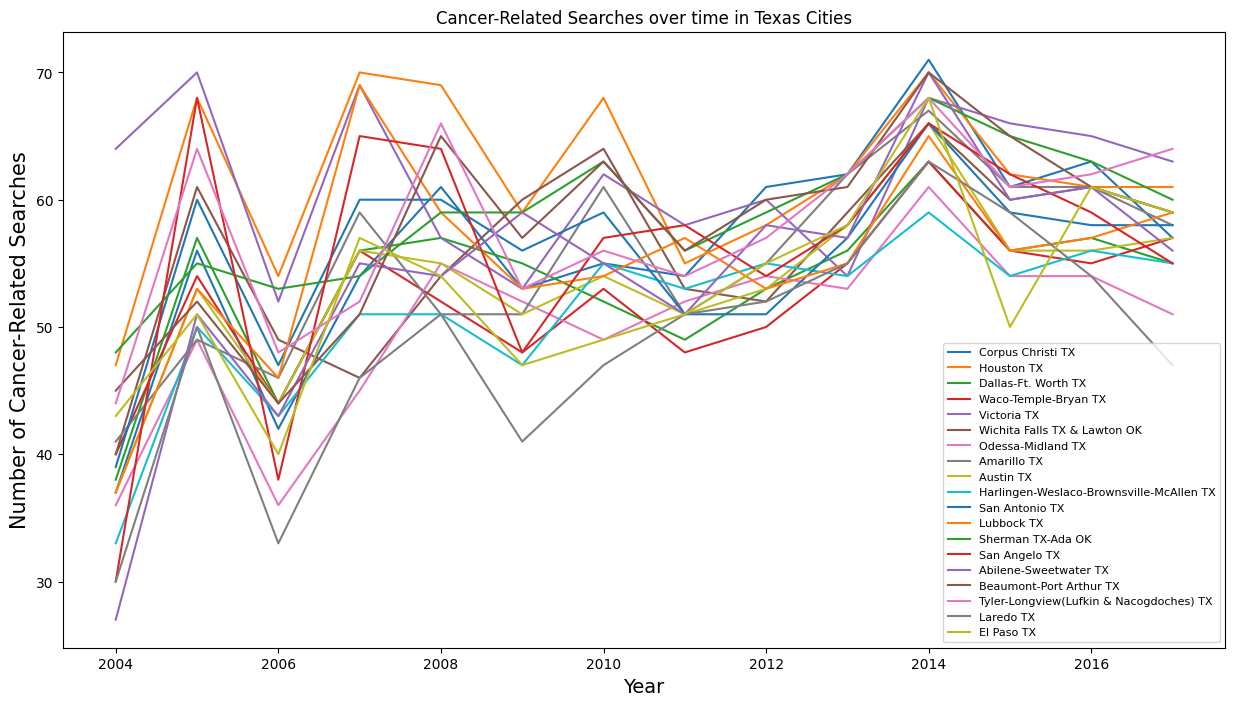

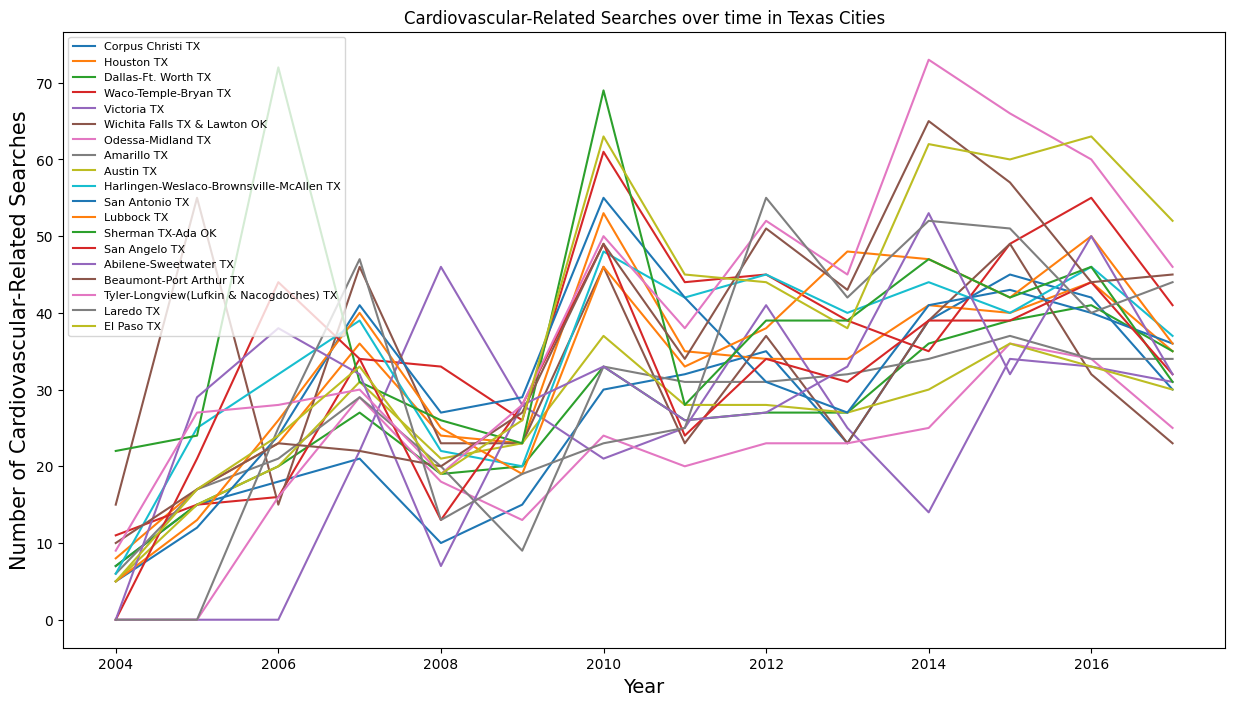

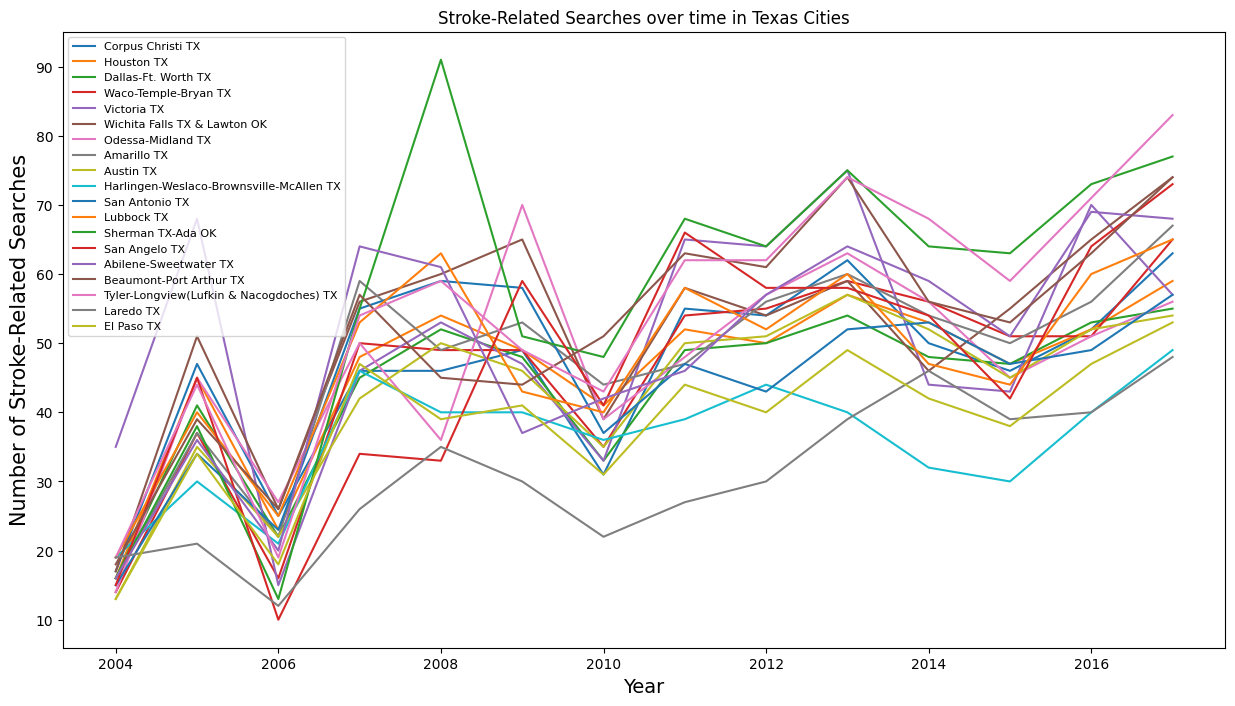

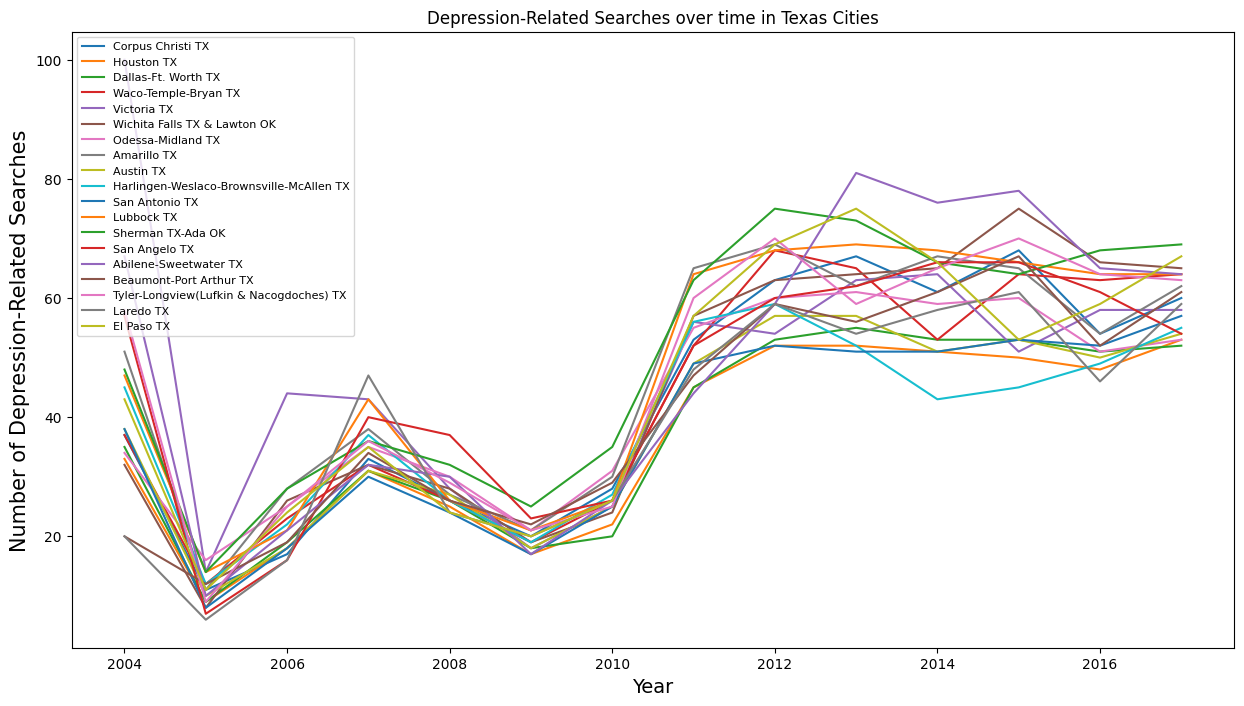

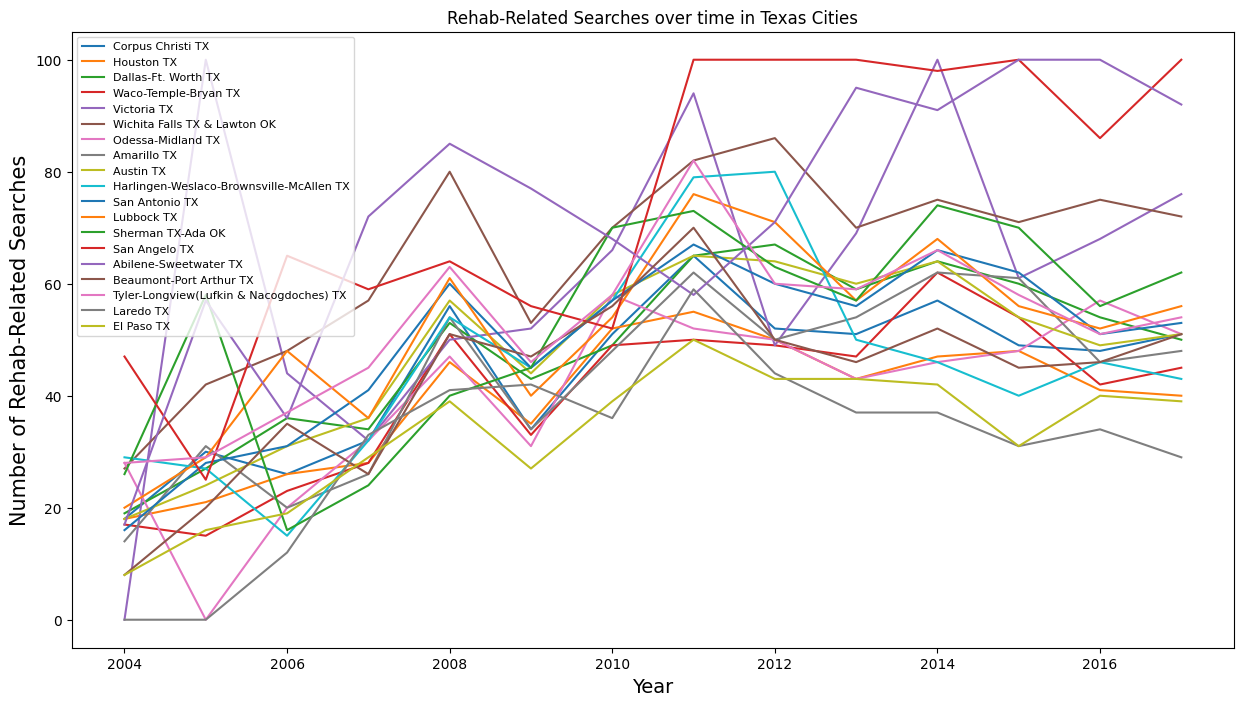

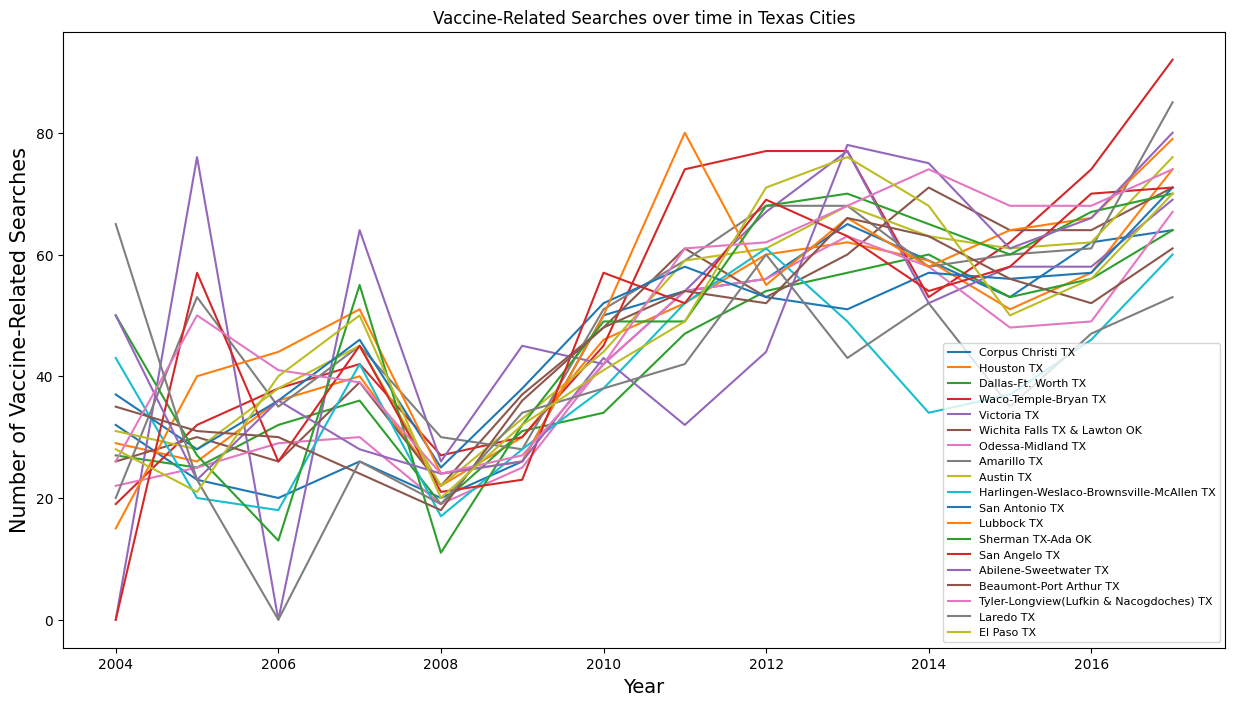

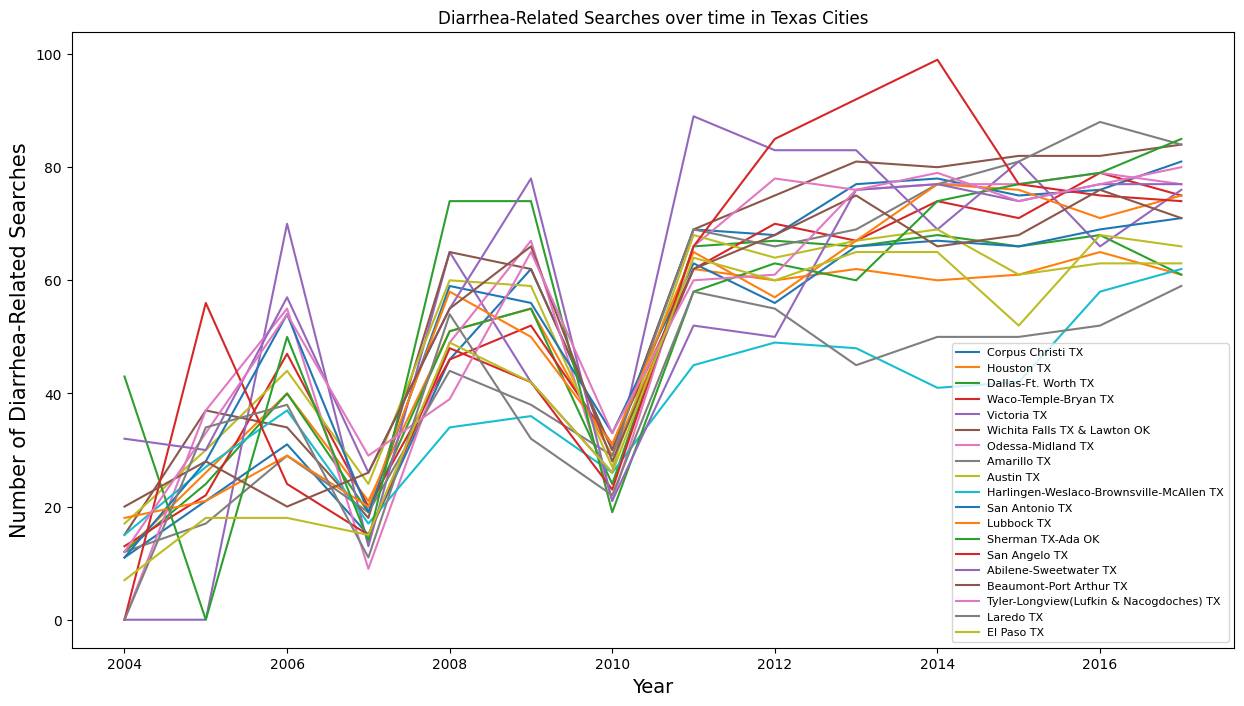

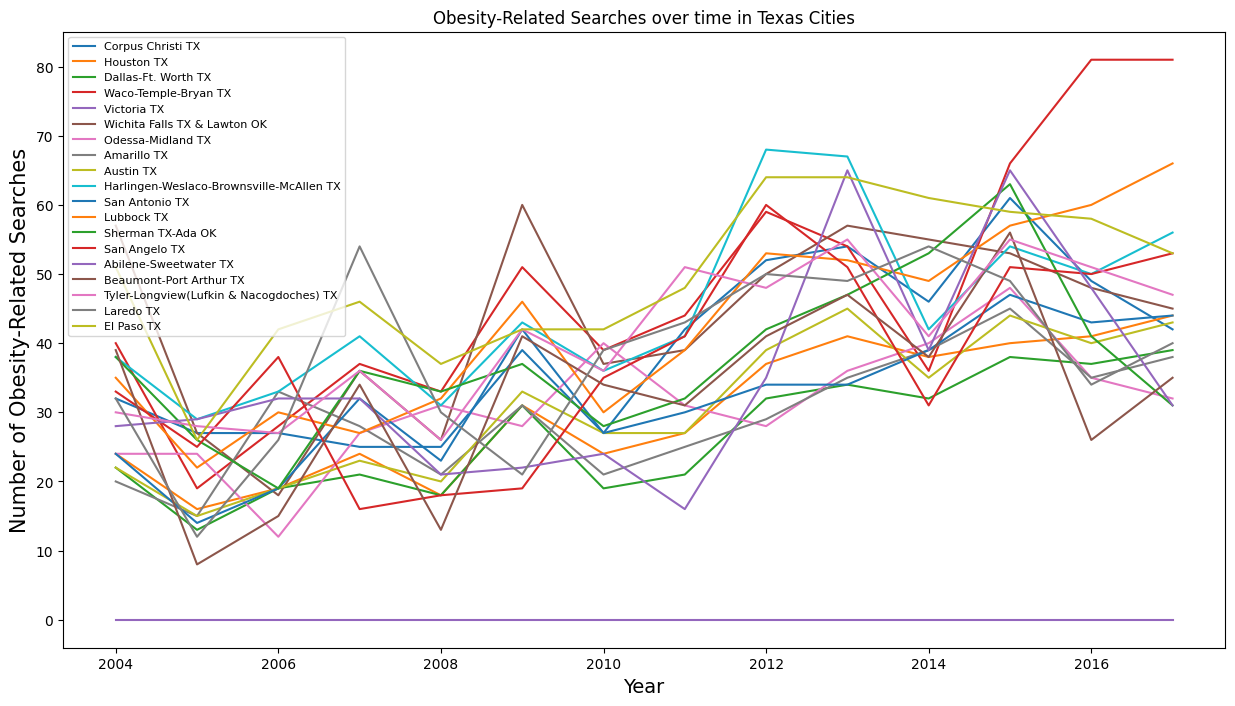

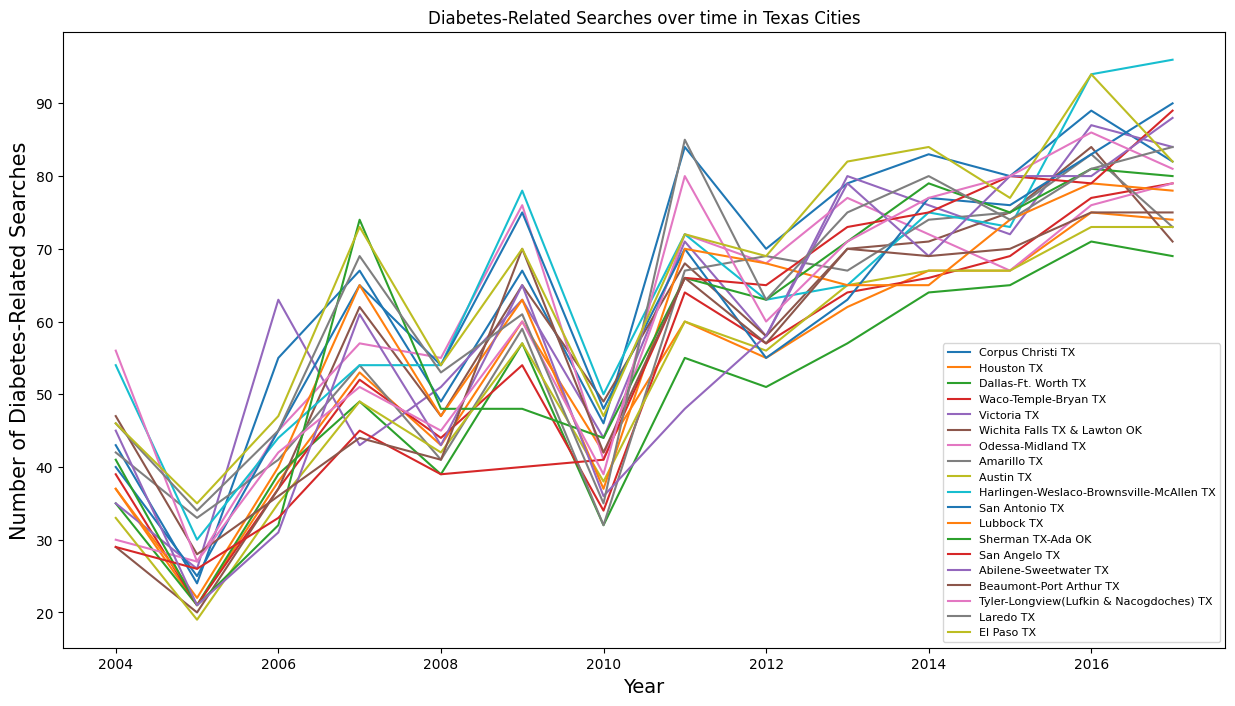

In [7]:
data_cancer = data.filter(like= 'cancer').copy()
data_cardiovascular = data.filter(like = 'cardiovascular').copy()
data_stroke = data.filter(like= 'stroke').copy()
data_depression = data.filter(like= 'depression').copy()
data_rehab = data.filter(like= 'rehab').copy()
data_vaccine = data.filter(like= 'vaccine').copy()
data_diarrhea = data.filter(like= 'diarrhea').copy()
data_obesity = data.filter(like= 'obesity').copy()
data_diabetes = data.filter(like= 'diabetes').copy()

def line_graph(inputdata, word):
    new = data['dma']
    inputdata.loc[:, 'Location'] = new  
    inputdata.columns = inputdata.columns.str.slice(0,4)
    inputdata = inputdata.rename(columns={'Loca':'Location'})

    if inputdata.index.name == 'Location':
        inputdata = inputdata.reset_index()
    
    inputdata = inputdata.set_index('Location')
    inputdata_T = inputdata.T
    inputdata_T.plot(figsize=(15,8))
    plt.legend(loc = 'best',
           prop= {'size':8})
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'Number of {word}-Related Searches', fontsize = 15)
    plt.title(f'{word}-Related Searches over time in Texas Cities')
    plt.show()

line_graph(data_cancer, 'Cancer')
line_graph(data_cardiovascular, 'Cardiovascular')
line_graph(data_stroke, 'Stroke')
line_graph(data_depression, 'Depression')
line_graph(data_rehab, 'Rehab')
line_graph(data_vaccine, 'Vaccine')
line_graph(data_diarrhea, 'Diarrhea')
line_graph(data_obesity, 'Obesity')
line_graph(data_diabetes, 'Diabetes')

Most commonly searched illness in each city. Take average for each city, and then find which is highest over the years for each city. 

In [8]:
exclude_col = ['dma']

new_columns = {}
for col in data.columns:
    if col not in exclude_col:
        new_columns[col] = col[5:]
    else:
        new_columns[col] = col
newdata = data.rename(columns=new_columns)

# List of conditions to average
keywords = ['cancer', 'cardiovascular', 'stroke', 'depression', 'rehab', 'vaccine', 'diarrhea', 'obesity', 'diabetes']

# For each keyword, find matching columns and compute row-wise average
for keyword in keywords:
    matching_cols = [col for col in newdata.columns if col == keyword]
    newdata[f'{keyword}_avg'] = newdata[matching_cols].mean(axis=1)

newdata.drop(keywords, axis=1, inplace=True)
newdata = newdata.set_index('dma')

newdata['Highest Condition'] = newdata[newdata.columns].idxmax(axis=1).str.replace('_avg', '')
newdata = newdata[['Highest Condition']]
newdata


Highest Condition
dma                                                       
Corpus Christi TX                                 diabetes
Houston TX                                          cancer
Dallas-Ft. Worth TX                                 cancer
Waco-Temple-Bryan TX                              diabetes
Victoria TX                                         cancer
Wichita Falls TX & Lawton OK                         rehab
Odessa-Midland TX                                 diabetes
Amarillo TX                                       diabetes
Austin TX                                           cancer
Harlingen-Weslaco-Brownsville-McAllen TX          diabetes
San Antonio TX                                    diabetes
Lubbock TX                                        diabetes
Sherman TX-Ada OK                                   cancer
San Angelo TX                                        rehab
Abilene-Sweetwater TX                                rehab
Beaumont-Port Arthur TX                             cancer
Tyler-Longview(Lufkin & Nacogdoches) TX           diabetes
Laredo TX                                         diabetes
El Paso TX                                        diabetes

In [9]:
newdata['Highest Condition'].value_counts()

Highest Condition
diabetes    10
cancer       6
rehab        3
Name: count, dtype: int64

Across all cities, searches related to diabetes, cancer, and rehab were the most frequently ranked as the highest on average
Diabetes is the most commonly searched condition on average across the greatest number of cities, followed by cancer and then rehab

In [10]:
from scipy.stats import chisquare

condition_counts = newdata['Highest Condition'].value_counts()
chi2_stat, p_val = chisquare(condition_counts)

print(f"Chi-square test for distribution of most common condition:\nChi2-statistic: {chi2_stat:.3f}, p-value: {p_val:.4f}")

Chi-square test for distribution of most common condition:
Chi2-statistic: 3.895, p-value: 0.1426


There is no statistically significant evidence that certain conditions are more common than others.
(This suggests that the variation in condition frequencies might just be due to random fluctuation, not a real underlying trend or bias in the data.)

In [11]:
from scipy.stats import f_oneway

data_cancer['Location'] = data_cancer['Loca']
data_cancer = data_cancer.drop(columns='Loca')

cities = data_cancer['Location'].unique()
groups = [data_cancer[data_cancer['Location'] == city].drop(columns= 'Location').values.flatten() for city in cities]

f_stat, p_val = f_oneway(*groups)
print(f"ANOVA for cancer-related searches across cities:\nF-statistic: {f_stat:.3f}, p-value: {p_val:.10f}")

ANOVA for cancer-related searches across cities:
F-statistic: 3.071, p-value: 0.0000451437


There is a statistically significant difference in cancer-related search activity across cities. (p < 0.05)

In [12]:
flattened_data = np.concatenate(groups)  # Combine all city arrays into one 1D array
labels = []
for city, group in zip(cities, groups):
    labels.extend([city] * len(group))  # Repeat city name for the length of that city's data
labels = np.array(labels)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=flattened_data, groups=labels)

tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_df[tukey_df['reject'] == True]



group1             group2  meandiff  \
105  Harlingen-Weslaco-Brownsville-McAllen TX         Houston TX   10.5714   
113  Harlingen-Weslaco-Brownsville-McAllen TX        Victoria TX   10.3571   
116                                Houston TX          Laredo TX  -13.2143   
118                                Houston TX  Odessa-Midland TX  -11.6429   
130                                 Laredo TX  Sherman TX-Ada OK   10.3571   
132                                 Laredo TX        Victoria TX   13.0000   
147                         Odessa-Midland TX        Victoria TX   11.4286   

      p-adj    lower    upper  reject  
105  0.0276   0.5196  20.6233    True  
113  0.0355   0.3053  20.4090    True  
116  0.0007 -23.2661  -3.1625    True  
118  0.0071 -21.6947  -1.5910    True  
130  0.0355   0.3053  20.4090    True  
132  0.0010   2.9482  23.0518    True  
147  0.0095   1.3767  21.4804    True

There are statistically significant differences in cancer searches between these pairs of cities. (p < 0.05)

In [13]:
from scipy.stats import f_oneway

data_diabetes['Location'] = data_diabetes['Loca']
data_diabetes = data_diabetes.drop(columns='Loca')

cities2 = data_diabetes['Location'].unique()
groups2 = [data_diabetes[data_diabetes['Location'] == city].drop(columns= 'Location').values.flatten() for city in cities2]

f_stat2, p_val2 = f_oneway(*groups2)
print(f"ANOVA for diabetes-related searches across cities:\nF-statistic: {f_stat2:.3f}, p-value: {p_val2:.10f}")

ANOVA for diabetes-related searches across cities:
F-statistic: 0.846, p-value: 0.6451588489


There is not a statistically significant difference in diabeted-related search activity across cities. (p > 0.005)

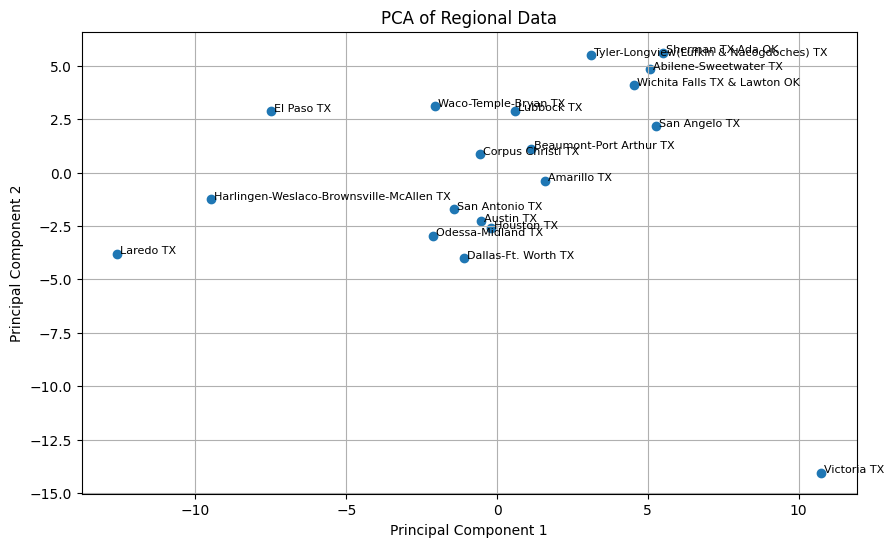

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

finaldata = data.reset_index(drop=True).set_index('dma')

numeric_col = finaldata.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_col)

# Run PCA
pca = PCA(n_components=2)  # or more if you want
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame for plotting or further analysis
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=numeric_col.index)

# Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Label each point with the region name
for city, (x, y) in pca_df.iterrows():
    plt.text(x+0.1, y, city, fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Regional Data')
plt.grid(True)
plt.show()



We observe that **Victoria** is in its own cluster near the bottom-right, indicating its possibly unique socioeconomic factors.  
Meanwhile, cities like **Austin, Odessa, Dallas, and San-Antonio** are clustered together near the middle.  
Another prominent cluster is in the top right, with cities like **Wichita Falls, Abilene, Tyler, and Sherman**.   

In [15]:
import numpy as np

pca = PCA()  # Keep all components
components = pca.fit_transform(scaled_data)

# Print as percentages with labels
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.2%}")

PC1: 23.03%
PC2: 16.21%
PC3: 9.72%
PC4: 8.29%
PC5: 6.88%
PC6: 6.12%
PC7: 4.88%
PC8: 4.76%
PC9: 4.41%
PC10: 3.14%
PC11: 2.64%
PC12: 2.44%
PC13: 1.94%
PC14: 1.69%
PC15: 1.41%
PC16: 1.18%
PC17: 0.74%
PC18: 0.52%
PC19: 0.00%


According to the PCA ratios, it seems as though our plot only explains about **40%** of the variance in the data.